In [ ]:
#importing modules

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mtp
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#reading the datasets
AP_data = pd.read_csv('/content/Admission_Predict.csv', engine='python', encoding='utf-8', error_bad_lines=False)
len(AP_data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


400

In [ ]:
AP_data = AP_data.rename(columns = {'GRE Score': 'GRE','TOEFL Score': 'TOEFL','University Rating': 'University_Rating','LOR ':'LOR',
                          'Chance of Admit ':'Admit_Chance'})
AP_data.head()

,Serial No.,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


##Data Preprocessing

In [ ]:
#handling missing values
AP_data.isnull().any()

Serial No.           False
GRE                  False
TOEFL                False
University_Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Admit_Chance         False
dtype: bool

##Data Visualizations


##Univariate Analysis

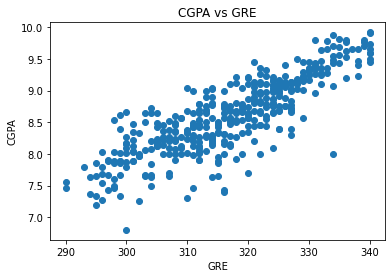

In [ ]:
plt.scatter(AP_data['GRE'],AP_data['CGPA'])
plt.title('CGPA vs GRE')
plt.xlabel('GRE')
plt.ylabel('CGPA')
plt.show()

Skewness of chance of admit :  -0.3534480999327828


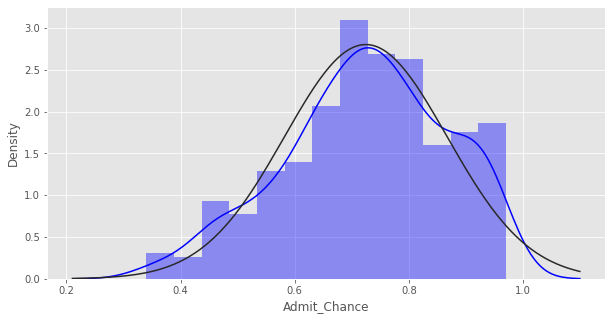

In [ ]:
#Data Visualization
plt.style.use('ggplot')
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
# lets see the distribution for the target variable
print('Skewness of chance of admit : ',AP_data['Admit_Chance'].skew())
plt.figure(figsize = (10,5))
sns.distplot(AP_data['Admit_Chance'],kde = True,color = 'b',fit = stats.norm)
plt.show()

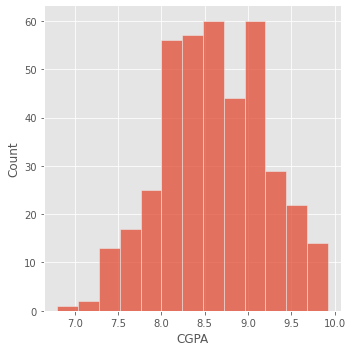

In [ ]:
sns.displot(AP_data.CGPA)

([<matplotlib.patches.Wedge at 0x7f1e14cb8d90>,
 [Text(-0.1635397261721476, 1.087775141269343, ''),
  Text(0.1932742218398109, -1.2855524396819509, '')],
 [Text(-0.08920348700298959, 0.5933318952378234, '154.8%'),
  Text(0.11893798267065285, -0.7911091936504312, '145.2%')])

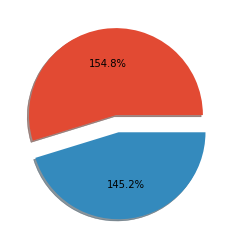

In [ ]:
plt.pie(AP_data.Research.value_counts(),[0,0.2],shadow='True',autopct="1%.1f%%")   #categorial column

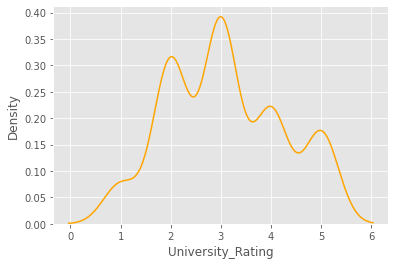

In [ ]:
sns.kdeplot(AP_data.University_Rating,color="OranGE")

Text(0.5, 1.0, 'GRE Score')

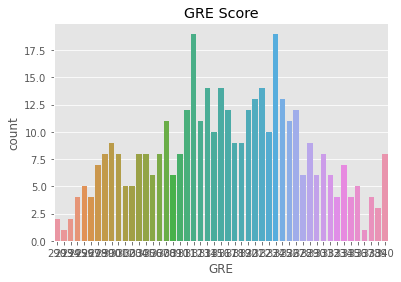

In [ ]:
sns.countplot(AP_data.GRE)
plt.title('GRE Score')

##Bivariate Analysis

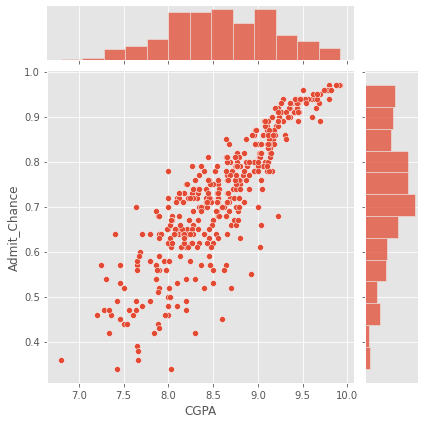

In [ ]:
sns.jointplot(AP_data.CGPA,AP_data.Admit_Chance)

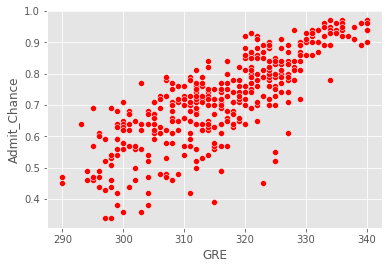

In [ ]:
sns.scatterplot(AP_data.GRE,AP_data.Admit_Chance,color="Red")

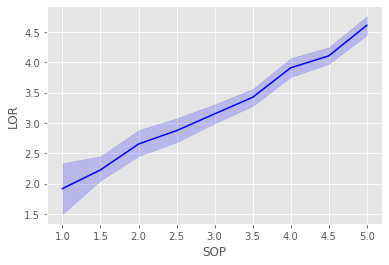

In [ ]:
sns.lineplot(AP_data.SOP,AP_data.LOR,color='Blue')

<BarContainer object of 400 artists>

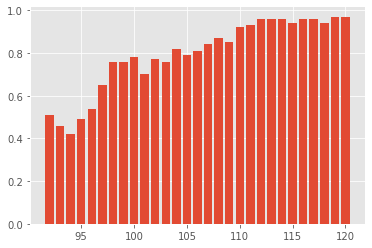

In [ ]:
plt.bar(AP_data.TOEFL,AP_data.Admit_Chance)

##Multicariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e13e83ed0>,
      dtype=object)

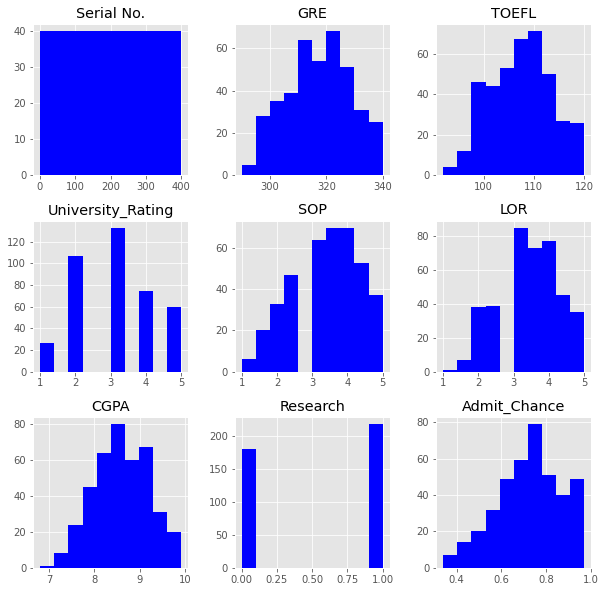

In [ ]:
AP_data.hist(figsize=(10,10),color="Blue")

##Splitting dependant and indepedant data


In [ ]:
#Splitting dependant and independant data
x = AP_data.iloc[:,1:8].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [ ]:
y = AP_data.iloc[:,8].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
x.shape

(400, 7)

In [ ]:
y.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

##Training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#regressor = RandomForestRegressor(n_estimators=400, random_state=90)
regressor = RandomForestRegressor(n_estimators=250,
                           max_features=(2/7), 
                           min_samples_split=5, 
                           n_jobs=2, 
                           random_state=1005)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([0.70172658, 0.67191482, 0.77260276, 0.66944165, 0.72797568,
       0.63516935, 0.71195871, 0.6757896 , 0.87902775, 0.92233185,
       0.54662439, 0.91582648, 0.70023216, 0.48156148, 0.84724756,
       0.65870917, 0.64174484, 0.8139534 , 0.6073836 , 0.73595247,
       0.86140638, 0.84265489, 0.63986923, 0.46317873, 0.81554687,
       0.59071478, 0.45679483, 0.68295504, 0.89530346, 0.65159884,
       0.64152505, 0.73749014, 0.74515744, 0.54840724, 0.76642311,
       0.761662  , 0.65153654, 0.88057943, 0.63094694, 0.93212333,
       0.74054043, 0.67506756, 0.72164766, 0.79447588, 0.80892928,
       0.66574868, 0.59640133, 0.70441089, 0.63613141, 0.59163207,
       0.68410637, 0.78081813, 0.63613962, 0.88011377, 0.71140724,
       0.73892949, 0.75866122, 0.74106847, 0.75894079, 0.85981238])

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.048697212813112796
Mean Squared Error: 0.005393783580111339
Root Mean Squared Error: 0.07344238272354281


In [ ]:
prediction = regressor.predict(x_test)
print("ORIGINAL DATA")
print(y_test[0:5])
print()
print("PREDICTED DATA")
#print(y_test)
#print(prediction)
#len(y_train)
print(y_pred[0:5])

ORIGINAL DATA
[0.71 0.7  0.79 0.73 0.72]

PREDICTED DATA
[0.70172658 0.67191482 0.77260276 0.66944165 0.72797568]


In [ ]:
admit_chance_pred = pd.DataFrame({'Actual_value': y_test,'Predicted_value': y_pred})
admit_chance_pred.head()

,Actual_value,Predicted_value
0,0.71,0.701727
1,0.70,0.671915
2,0.79,0.772603
3,0.73,0.669442
4,0.72,0.727976


In [ ]:
import joblib
joblib.dump(regressor, 'model.pkl')

['model.pkl']

##Test


In [ ]:
test_mse = np.sqrt(mean_squared_error(y_test, y_pred))
train_r2 = regressor.score(x_train, y_train)
test_r2 = regressor.score(x_test, y_test)

print("Test MSE ::", test_mse)
print("Train R^2 ::", train_r2)
print("Test R^2 ::", test_r2)

Test MSE :: 0.07344238272354281
Train R^2 :: 0.9383883262033191
Test R^2 :: 0.6934939048262342
